# Agent-Based Model on Cat Behavior

### In our project we decided to create 4 total cats with several different traits ranging from hunger levels to personality traits
### Based on the traits each cat has will determine their interactions with each other, objects in the room, and people who walk in the room

In [1]:
from IPython.display import HTML
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time

To start here is a legend of all potential personality traits and needs our cats may have.

In [2]:
legend= {'Calm' : 'Very relaxed',
         'Clumsy' : 'Will tumble over and bump into things' ,
         'Shy' : 'Takes a while to warm up, might hide away' ,
         'Affectionate' : 'Loves cuddles' ,
         "Playful" : 'Wants to hunt and play' ,
         'Smart' : 'Learns quickly good at tricks' , 
         'Anxious' : 'Hides and paces around' , 
         'Angry' : 'Will hiss, growl, and bite' ,
         'Curious' : 'Adventurous and Engageful ' ,
         'Scared' : 'Will run away' ,
         'Energetic' : 'Will run around and play'} 
# Will not be used

Because we want our interactions to be as random and organic as possible we will create a class that will help cat decisions!

In [ ]:
# import random

# class Cat:
#     def __init__(self, name, personality, image_path):
#         self.name = name
#         self.image_path = image_path
#         self.personality = personality

#         self.needs = {'hunger': 0, 'sleep': 0, 'potty': 0}
#         self.activity = "roam"

#         self.x, self.y = 15, 137  # Start at bed
#         self.target = (self.x, self.y)
#         self.speed = 1.5

#         self.history = []

#         # Trackers for new logic
#         self.time_roaming = 0
#         self.time_playing = 0
#         self.last_eaten = -1
#         self.last_pottied = -1

#     def update_needs(self):
#         for need in self.needs:
#             self.needs[need] += 1

#     def decide_action(self, hour):
#         # Sleep at night unless aggressive/playful
#         if 22 <= hour or hour < 6:
#             if self.personality.get("Aggressive", 0) < 2 and self.personality.get("Playful", 0) < 2:
#                 self.activity = 'sleeping'
#                 self.target = (15, 137)
#                 self.time_roaming = 0
#                 self.time_playing = 0
#                 return

#         # Force eat if roaming too long without food
#         if self.time_roaming >= 3 and self.last_eaten < hour - 3:
#             self.do_action("eat")
#             return

#         # Force sleep after eat + potty + roaming or 2+ plays
#         if (self.last_eaten != -1 and self.last_pottied != -1 and
#             (self.activity == "roam" or self.time_playing >= 2)):
#             self.do_action("sleep")
#             self.time_roaming = 0
#             self.time_playing = 0
#             return

#         # Normal priority logic
#         priorities = {
#             'eat': self.needs['hunger'],
#             'sleep': self.needs['sleep'],
#             'bathroom': self.needs['potty'],
#             'play': self.personality.get('Playful', 0)
#         }
#         chosen = max(priorities, key=priorities.get)
#         self.do_action(chosen)

#     def do_action(self, action):
#         # Update roaming/playing counters
#         if action == "roam":
#             self.time_roaming += 1
#         else:
#             self.time_roaming = 0

#         if action == "play":
#             self.time_playing += 1
#         else:
#             self.time_playing = 0

#         # Action-specific behaviors
#         if action == 'eat':
#             self.needs['hunger'] = 0
#             self.needs['potty'] += 2
#             self.activity = 'eating'
#             self.target = (15, 12)
#         elif action == 'sleep':
#             self.needs['sleep'] = max(0, self.needs['sleep'] - 3)
#             self.activity = 'sleeping'
#             self.target = (15, 137)
#         elif action == 'bathroom':
#             self.needs['potty'] = 0
#             self.activity = 'bathroom'
#             self.target = (140, 137)
#         elif action == 'play':
#             self.needs['hunger'] += 2
#             self.needs['sleep'] += 2
#             self.needs['potty'] += 1
#             self.activity = 'playing'
#             self.target = (140, 12)
#         else:
#             self.activity = 'roam'
#             self.target = self.random_target()

#     def move(self):
#         dx = self.target[0] - self.x
#         dy = self.target[1] - self.y
#         dist = (dx**2 + dy**2)**0.5
#         if dist > 1:
#             self.x += self.speed * dx / dist
#             self.y += self.speed * dy / dist
#             self.x = min(max(self.x, 0), 150)
#             self.y = min(max(self.y, 0), 150)

#     def interact_with(self, other_cat):
#         if self == other_cat:
#             return
#         dist = ((self.x - other_cat.x)**2 + (self.y - other_cat.y)**2)**0.5
#         if dist < 25:
#             if self.personality.get("Shy", 0) >= 2:
#                 self.activity = "avoiding"
#                 dx = self.x - other_cat.x
#                 dy = self.y - other_cat.y
#                 self.target = (self.x + dx, self.y + dy)
#             elif self.personality.get("Aggressive", 0) >= 2:
#                 self.activity = "confronting"
#                 self.target = (other_cat.x, other_cat.y)
#             elif self.personality.get("Playful", 0) >= 2 and other_cat.personality.get("Aggressive", 0) < 2:
#                 self.activity = "approaching"
#                 self.target = (other_cat.x, other_cat.y)

#     def log_state(self, hour):
#         if self.activity == "eating":
#             self.last_eaten = hour
#         elif self.activity == "bathroom":
#             self.last_pottied = hour

#         summary = f"Hour {hour}: {self.name} is {self.activity} at ({int(self.x)}, {int(self.y)})"
#         self.history.append({
#             'hour': hour,
#             'x': self.x,
#             'y': self.y,
#             'activity': self.activity,
#             'needs': self.needs.copy(),
#             'summary': summary
#         })

#     def random_target(self):
#         return (random.randint(10, 140), random.randint(10, 140))

#     def __repr__(self):
#         return f"Cat({self.name}, activity={self.activity})"

In [3]:
# class Cat:
#     def __init__(self,name,personality):
#         self.name = name
#         self.personality = personality
#         self.activity = 'still'
#         #setting for physical needs
#         self.sleep = 0
#         self.hunger = 0
#         self.potty = 0

#         self.x, self.y = 0, 0
#         self.speed = 0.5
#         self.target = self.targets()

#     def update_traits(self):
#         #these will change depending on the cats needs & traits
#         self.hunger +=1
#         self.potty +=1
#         self.sleep +=1

# # I would add mapping here in the cat class for decide_target and move

#     def eat(self):
#         self.hunger =0
#         self.potty +=2
#         self.activity = "eat"

#     def bed(self):
#         self.sleep =max(0,self.sleep -3)
#         self.activity = "sleep"

#     def play(self):
#         self.hunger += 2
#         self.sleep +=2
#         self.potty +=1
#         self.activity = "play"
        
#     def bathroom (self):
#         self.potty =0
#         self.activity = "bathroom"
        
#     def action_choices(self):
#         if self.potty >= 5:
#             return 'bathroom'
#         elif self.hunger >= 5:
#             return 'eat'
#         elif self.sleep >= 5
#             return 'sleep'
#         else:
#             return 'play'
            
# # this part takes into consideration the numbers after each trait, so if a cat is 
# # has 3 for smart and 1 for anger they will most likely interact based on their other
# #trait
    
#     def random_choice(self):
#         inter=list(self.personality.keys())
#         rate=[self.personality[inter] for trait in inter]
#         picked=random.choices(inter,rate=rate,k=1)[0]
#         return picked

#     def interact(self,other):
#         traits_self = self.random_choice()
#         traits_other = other.random_choice()
    #     react ={
    #     'Calm' : 'Meow at each other',
    #     'Clumsy' : 'Bump into each other' ,
    #     'Shy' : 'hide' ,
    #     'Affectionate' : 'cuddle together' ,
    #     "Playful" : 'play together' ,
    #     'Smart' : 'Show tricks' , 
    #     'Anxious' : 'Walk in circles' , 
    #     'Angry' : 'Fight each other' ,
    #     'Curious' : 'Explore together' ,
    #     'Scared' : 'Run away' ,
    #     'Energetic' : 'Chase each other'} 
    #     outcome = react.get(trait_self, "notice each other")
    #     outcome_other=react.get(trait_other,"notice each other")
    #     if outcome == outcome_other:
    #          return f"{self.name} and {other.name} {outcome_self}."
    #     else:
    #         chosen = random.choice([outcome_self, outcome_other])
    #         return f"{self.name} and {other.name} end up {chosen}."

            
    # def __repr__(self):
    #     print(f'Cat{self.name}, is {self.peronality}')

Code below is from Shanze I
Could not figure out why items would not move
But I believe its because there is not enough logic for the items to move.
there is also some pygame example I am having issues with items appearing on the page

In [ ]:
#pygame example
import pygame
import random

# Initialize Pygame
pygame.init()

# Define screen dimensions
SCREEN_WIDTH = 800
SCREEN_HEIGHT = 600
screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
pygame.display.set_caption("Agent-Based Model Movement")

# Define the agent class
class Agent:
    def __init__(self, x, y, color, speed=2):
        self.x = x
        self.y = y
        self.color = color
        self.speed = speed
        self.size = 10  # Size of the agent (circle)
    
    def move(self):
        # Move the agent randomly within its speed range
        self.x += random.uniform(-self.speed, self.speed)
        self.y += random.uniform(-self.speed, self.speed)
        
        # Keep the agent within screen boundaries
        self.x = max(0, min(self.x, SCREEN_WIDTH - self.size))
        self.y = max(0, min(self.y, SCREEN_HEIGHT - self.size))
    
    def draw(self):
        # Draw the agent as a circle
        pygame.draw.circle(screen, self.color, (int(self.x), int(self.y)), self.size)

# Create a set of agents
agents = [Agent(random.randint(0, SCREEN_WIDTH), random.randint(0, SCREEN_HEIGHT), (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))) for _ in range(10)]

# Game loop
clock = pygame.time.Clock()
running = True
while running:
    screen.fill((255, 255, 255))  # Fill the screen with white
    
    # Check for events (like quitting)
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
    
    # Update agents
    for agent in agents:
        agent.move()
        agent.draw()
    
    # Update the display
    pygame.display.flip()
    
    # Control the game speed (frames per second)
    clock.tick(60)  # 60 FPS (frames per second)

# Quit Pygame
pygame.quit()


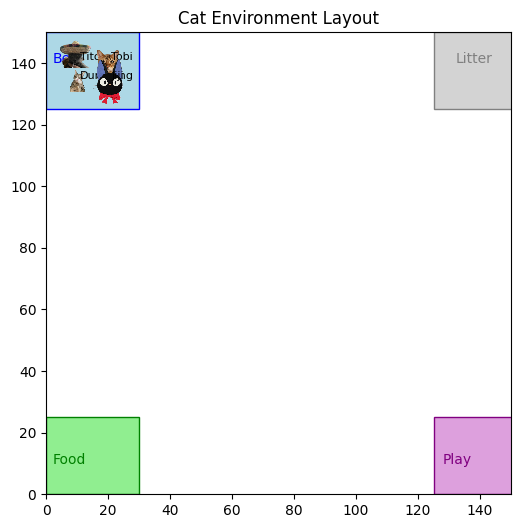

In [1]:
from IPython.display import HTML
import numpy as np  
import numpy.random as rand
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time
# To start here is a legend of all potential personality traits and needs our cats may have.

legend= {'Calm' : 'Very relaxed; Gets along with all cats; Gets along with all humans',
         'Shy' : 'Takes a while to warm up, hides away; Does not interact with other cats or humans' ,
         "Playful" : 'Wants to hunt and play; Gets along with Calm cats, Fights with Aggressive cats; Gets along with all humans' ,
         'Aggressive' : 'Will hiss, growl, and bite; Fights with all cats; Fights with humans' 
        }  #
# Trait	Behavior Around Others
# Shy ≥ 2	Avoids other cats — moves away if another cat is nearby
# Aggressive ≥ 2	Approaches other cats — initiates "conflict" when nearby
# Calm ≥ 2	Doesn't react to other cats (neutral)
# Playful ≥ 2	Moves toward cats (seeks interaction), unless the other cat is aggressive
#Because we want our interactions to be as random and organic as possible we will create a class that will help cat decisions!

import random

class Cat:
    def __init__(self, name, personality, image_path):
        self.name = name
        self.image_path = image_path
        self.personality = personality

        self.needs = {'hunger': 0, 'sleep': 0, 'potty': 0}
        self.activity = "roam"

        self.x, self.y = 15, 137  # Start at bed
        self.target = (self.x, self.y)
        self.speed = 1.5

        self.history = []

        # Trackers for new logic
        self.time_roaming = 0
        self.time_playing = 0
        self.last_eaten = -1
        self.last_pottied = -1

    def update_needs(self):
        for need in self.needs:
            self.needs[need] += 1

    def decide_action(self, hour):
        # Sleep at night unless aggressive/playful
        if 22 <= hour or hour < 6:
            if self.personality.get("Aggressive", 0) < 2 and self.personality.get("Playful", 0) < 2:
                self.activity = 'sleeping'
                self.target = (15, 137)
                self.time_roaming = 0
                self.time_playing = 0
                return

        # Force eat if roaming too long without food
        if self.time_roaming >= 3 and self.last_eaten < hour - 3:
            self.do_action("eat")
            return

        # Force sleep after eat + potty + roaming or 2+ plays
        if (self.last_eaten != -1 and self.last_pottied != -1 and
            (self.activity == "roam" or self.time_playing >= 2)):
            self.do_action("sleep")
            self.time_roaming = 0
            self.time_playing = 0
            return

        # Normal priority logic
        priorities = {
            'eat': self.needs['hunger'],
            'sleep': self.needs['sleep'],
            'bathroom': self.needs['potty'],
            'play': self.personality.get('Playful', 0)
        }
        chosen = max(priorities, key=priorities.get)
        self.do_action(chosen)

    def do_action(self, action):
        # Update roaming/playing counters
        if action == "roam":
            self.time_roaming += 1
        else:
            self.time_roaming = 0

        if action == "play":
            self.time_playing += 1
        else:
            self.time_playing = 0

        # Action-specific behaviors
        if action == 'eat':
            self.needs['hunger'] = 0
            self.needs['potty'] += 2
            self.activity = 'eating'
            self.target = (15, 12)
        elif action == 'sleep':
            self.needs['sleep'] = max(0, self.needs['sleep'] - 3)
            self.activity = 'sleeping'
            self.target = (15, 137)
        elif action == 'bathroom':
            self.needs['potty'] = 0
            self.activity = 'bathroom'
            self.target = (140, 137)
        elif action == 'play':
            self.needs['hunger'] += 2
            self.needs['sleep'] += 2
            self.needs['potty'] += 1
            self.activity = 'playing'
            self.target = (140, 12)
        else:
            self.activity = 'roam'
            self.target = self.random_target()

    def move(self):
        dx = self.target[0] - self.x
        dy = self.target[1] - self.y
        dist = (dx**2 + dy**2)**0.5
        if dist > 1:
            self.x += self.speed * dx / dist
            self.y += self.speed * dy / dist
            self.x = min(max(self.x, 0), 150)
            self.y = min(max(self.y, 0), 150)

    def interact_with(self, other_cat):
        if self == other_cat:
            return
        dist = ((self.x - other_cat.x)**2 + (self.y - other_cat.y)**2)**0.5
        if dist < 25:
            if self.personality.get("Shy", 0) >= 2:
                self.activity = "avoiding"
                dx = self.x - other_cat.x
                dy = self.y - other_cat.y
                self.target = (self.x + dx, self.y + dy)
            elif self.personality.get("Aggressive", 0) >= 2:
                self.activity = "confronting"
                self.target = (other_cat.x, other_cat.y)
            elif self.personality.get("Playful", 0) >= 2 and other_cat.personality.get("Aggressive", 0) < 2:
                self.activity = "approaching"
                self.target = (other_cat.x, other_cat.y)

    def log_state(self, hour):
        if self.activity == "eating":
            self.last_eaten = hour
        elif self.activity == "bathroom":
            self.last_pottied = hour

        summary = f"Hour {hour}: {self.name} is {self.activity} at ({int(self.x)}, {int(self.y)})"
        self.history.append({
            'hour': hour,
            'x': self.x,
            'y': self.y,
            'activity': self.activity,
            'needs': self.needs.copy(),
            'summary': summary
        })

    def random_target(self):
        return (random.randint(10, 140), random.randint(10, 140))

    def __repr__(self):
        return f"Cat({self.name}, activity={self.activity})"
cats = [
    Cat('Tito', {
        'Playful': 2,
        'Shy': 1,
        'Calm': 1,
        'Aggressive': 1
    }, "tito.png"),

    Cat('Tobi', {
        'Playful': 1,
        'Shy': 2,
        'Calm': 1,
        'Aggressive': 1
    }, "tobi.png"),

    Cat('Dumpling', {
        'Playful': 1,
        'Shy': 1,
        'Calm': 2,
        'Aggressive': 1
    }, "dumpling.png"),

    Cat('Jiji', {
        'Playful': 1,
        'Shy': 1,
        'Calm': 1,
        'Aggressive': 2
    }, "jiji.png")
]
# Here you can find out who our cats are and what their personality traits are!

# The start of the simulation for the visualization.

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

# 📦 Cache loaded images
cat_images = {}

# 📸 Load image with optional zoom
def get_cat_image(path, zoom=0.15):
    if path not in cat_images:
        cat_images[path] = OffsetImage(mpimg.imread(path), zoom=zoom)
    return cat_images[path]

# 🛏️ Draw environment layout
def draw_environment(ax):
    ax.set_xlim(0, 150)
    ax.set_ylim(0, 150)
    ax.set_title("Cat Environment Layout")

    # Add zones
    ax.add_patch(patches.Rectangle((0, 125), 30, 25, edgecolor='blue', facecolor='lightblue'))
    ax.text(2, 140, "Bed", fontsize=10, color='blue')

    ax.add_patch(patches.Rectangle((125, 125), 30, 25, edgecolor='gray', facecolor='lightgray'))
    ax.text(132, 140, "Litter", fontsize=10, color='gray')

    ax.add_patch(patches.Rectangle((0, 0), 30, 25, edgecolor='green', facecolor='lightgreen'))
    ax.text(2, 10, "Food", fontsize=10, color='green')

    ax.add_patch(patches.Rectangle((125, 0), 30, 25, edgecolor='purple', facecolor='plum'))
    ax.text(128, 10, "Play", fontsize=10, color='purple')

# 🐱 Add cats to the plot (static or initial state)
def add_cats_to_plot(ax, cat_data, bed_center=(15, 137), zoom=0.15):
    offsets = [(-5, 3), (5, 3), (-5, -3), (5, -3)]  # prevent overlap
    for (name, img_file), (dx, dy) in zip(cat_data, offsets):
        img = get_cat_image(img_file, zoom)
        ab = AnnotationBbox(img, (bed_center[0] + dx, bed_center[1] + dy), frameon=False)
        ax.add_artist(ab)
        ax.text(bed_center[0] + dx + 1, bed_center[1] + dy + 1, name, fontsize=8)
def update(hour):
    ax.clear()
    draw_environment(ax)
    ax.set_title(f"Hour {hour}")

    for cat in cats:
        cat.decide_action(hour)
        cat.move()
        cat.log_state(hour)
    for cat in cats:
        img = get_cat_image(cat.image_path)
        ab = AnnotationBbox(img, (cat.x, cat.y), frameon=False)
        ax.add_artist(ab)
        ax.text(cat.x + 1, cat.y + 1, cat.name, fontsize=8)

    # hour_data = log_df[log_df['hour'] == hour]
    # for _, row in hour_data.iterrows():
    #     img = get_cat_image(row['name'].lower() + ".png")
    #     ab = AnnotationBbox(img, (row['x'], row['y']), frameon=False)
    #     ax.add_artist(ab)
    #     ax.text(row['x'] + 1, row['y'] + 1, row['name'], fontsize=8)
cat_data = [
    ("Tito", "tito.png"),
    ("Tobi", "tobi.png"),
    ("Dumpling", "dumpling.png"),
    ("Jiji", "jiji.png")
]

fig, ax = plt.subplots(figsize=(6, 6))
draw_environment(ax)
add_cats_to_plot(ax, cat_data)
ani = animation.FuncAnimation(fig, update, frames=range(0, 24), interval=1000, repeat=False)
plt.show() 

/home/carreon7/.local/lib/python3.11/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


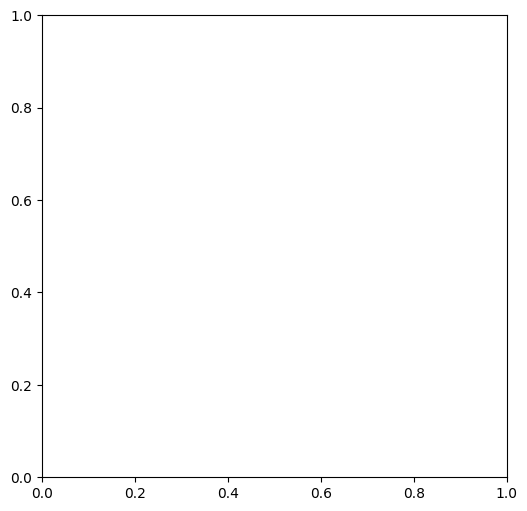

IndexError: list index out of range

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.animation as animation
import pandas as pd
#=== Visualization Setup ===
fig, ax = plt.subplots(figsize=(6, 6))

#🐾 Reuse the environment drawing code
def draw_environment(ax):
    ax.set_xlim(0, 150)
    ax.set_ylim(0, 150)
    ax.set_title("Cat Environment Layout")

    ax.add_patch(patches.Rectangle((0, 125), 30, 25, edgecolor='blue', facecolor='lightblue'))
    ax.text(2, 140, "Bed", fontsize=10, color='blue')

    ax.add_patch(patches.Rectangle((125, 125), 30, 25, edgecolor='gray', facecolor='lightgray'))
    ax.text(132, 140, "Litter", fontsize=10, color='gray')

    ax.add_patch(patches.Rectangle((0, 0), 30, 25, edgecolor='green', facecolor='lightgreen'))
    ax.text(2, 10, "Food", fontsize=10, color='green')

    ax.add_patch(patches.Rectangle((125, 0), 30, 25, edgecolor='purple', facecolor='plum'))
    ax.text(128, 10, "Play", fontsize=10, color='purple')

#🐱 Image caching helper
cat_images = {}

def get_cat_image(path, zoom=0.15):
    if path not in cat_images:
        cat_images[path] = OffsetImage(mpimg.imread(path), zoom=zoom)
    return cat_images[path]

#🕒 Frame update function
def animate(hour):
    ax.clear()
    draw_environment(ax)
    ax.set_title(f"Hour {hour}")

    hour_data = log_df[logdf['hour'] == hour]
    for _, row in hour_data.iterrows():
        img = get_cat_image(row['name'].lower() + ".png")
        ab = AnnotationBbox(img, (row['x'], row['y']), frameon=False)
        ax.add_artist(ab)
        ax.text(row['x'] + 1, row['y'] + 1, row['name'], fontsize=8)

#🎥 Animate
ani = animation.FuncAnimation(fig, animate, frames=24, interval=1000, repeat=True)

#📺 Show animation
plt.show()

#💾 Optional: Save animation as GIF or MP4
ani.save("cat_simulation.gif", writer="pillow")
ani.save("cat_simulation.mp4", writer="ffmpeg")

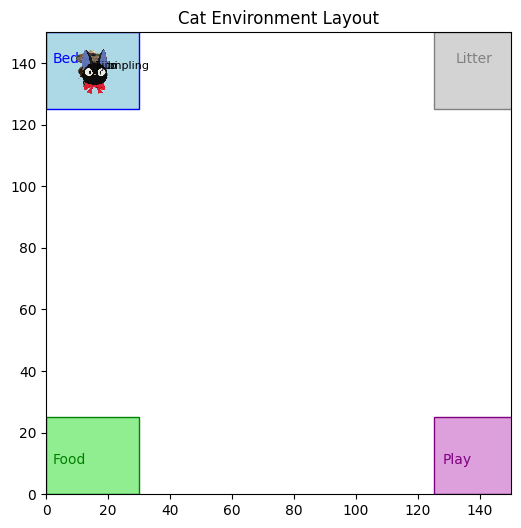

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import time

# Define the Cat class
class Cat:
    def __init__(self, name, personality, image_path):
        self.name = name
        self.image_path = image_path
        self.personality = personality

        self.needs = {'hunger': 0, 'sleep': 0, 'potty': 0}
        self.activity = "roam"

        self.x, self.y = 15, 137  # Start at bed
        self.target = (self.x, self.y)
        self.speed = 1.5

        # Trackers for new logic
        self.time_roaming = 0
        self.time_playing = 0
        self.last_eaten = -1
        self.last_pottied = -1

    def update_needs(self):
        for need in self.needs:
            self.needs[need] += 1

    def decide_action(self, hour):
        # Sleep at night unless aggressive/playful
        if 22 <= hour or hour < 6:
            if self.personality.get("Aggressive", 0) < 2 and self.personality.get("Playful", 0) < 2:
                self.activity = 'sleeping'
                self.target = (15, 137)
                self.time_roaming = 0
                self.time_playing = 0
                return

        # Force eat if roaming too long without food
        if self.time_roaming >= 3 and self.last_eaten < hour - 3:
            self.do_action("eat")
            return

        # Force sleep after eat + potty + roaming or 2+ plays
        if (self.last_eaten != -1 and self.last_pottied != -1 and
            (self.activity == "roam" or self.time_playing >= 2)):
            self.do_action("sleep")
            self.time_roaming = 0
            self.time_playing = 0
            return

        # Normal priority logic
        priorities = {
            'eat': self.needs['hunger'],
            'sleep': self.needs['sleep'],
            'bathroom': self.needs['potty'],
            'play': self.personality.get('Playful', 0)
        }
        chosen = max(priorities, key=priorities.get)
        self.do_action(chosen)

    def do_action(self, action):
        # Update roaming/playing counters
        if action == "roam":
            self.time_roaming += 1
        else:
            self.time_roaming = 0

        if action == "play":
            self.time_playing += 1
        else:
            self.time_playing = 0

        # Action-specific behaviors
        if action == 'eat':
            self.needs['hunger'] = 0
            self.needs['potty'] += 2
            self.activity = 'eating'
            self.target = (15, 12)
        elif action == 'sleep':
            self.needs['sleep'] = max(0, self.needs['sleep'] - 3)
            self.activity = 'sleeping'
            self.target = (15, 137)
        elif action == 'bathroom':
            self.needs['potty'] = 0
            self.activity = 'bathroom'
            self.target = (140, 137)
        elif action == 'play':
            self.needs['hunger'] += 2
            self.needs['sleep'] += 2
            self.needs['potty'] += 1
            self.activity = 'playing'
            self.target = (140, 12)
        else:
            self.activity = 'roam'
            self.target = self.random_target()

    def move(self):
        dx = self.target[0] - self.x
        dy = self.target[1] - self.y
        dist = (dx**2 + dy**2)**0.5
        if dist > 1:
            self.x += self.speed * dx / dist
            self.y += self.speed * dy / dist
            self.x = min(max(self.x, 0), 150)
            self.y = min(max(self.y, 0), 150)

    def interact_with(self, other_cat):
        if self == other_cat:
            return
        dist = ((self.x - other_cat.x)**2 + (self.y - other_cat.y)**2)**0.5
        if dist < 25:
            if self.personality.get("Shy", 0) >= 2:
                self.activity = "avoiding"
                dx = self.x - other_cat.x
                dy = self.y - other_cat.y
                self.target = (self.x + dx, self.y + dy)
            elif self.personality.get("Aggressive", 0) >= 2:
                self.activity = "confronting"
                self.target = (other_cat.x, other_cat.y)
            elif self.personality.get("Playful", 0) >= 2 and other_cat.personality.get("Aggressive", 0) < 2:
                self.activity = "approaching"
                self.target = (other_cat.x, other_cat.y)

    def log_state(self, hour):
        if self.activity == "eating":
            self.last_eaten = hour
        elif self.activity == "bathroom":
            self.last_pottied = hour

    def random_target(self):
        return (random.randint(10, 140), random.randint(10, 140))

    def __repr__(self):
        return f"Cat({self.name}, activity={self.activity})"

# Create the cats
cats = [
    Cat('Tito', {
        'Playful': 2,
        'Shy': 1,
        'Calm': 1,
        'Aggressive': 1
    }, "tito.png"),

    Cat('Tobi', {
        'Playful': 1,
        'Shy': 2,
        'Calm': 1,
        'Aggressive': 1
    }, "tobi.png"),

    Cat('Dumpling', {
        'Playful': 1,
        'Shy': 1,
        'Calm': 2,
        'Aggressive': 1
    }, "dumpling.png"),

    Cat('Jiji', {
        'Playful': 1,
        'Shy': 1,
        'Calm': 1,
        'Aggressive': 2
    }, "jiji.png")
]

# Visualization functions
def get_cat_image(path, zoom=0.15):
    img = OffsetImage(plt.imread(path), zoom=zoom)
    return img

def draw_environment(ax):
    ax.set_xlim(0, 150)
    ax.set_ylim(0, 150)
    ax.set_title("Cat Environment Layout")

    # Add zones
    ax.add_patch(plt.Rectangle((0, 125), 30, 25, edgecolor='blue', facecolor='lightblue'))
    ax.text(2, 140, "Bed", fontsize=10, color='blue')

    ax.add_patch(plt.Rectangle((125, 125), 30, 25, edgecolor='gray', facecolor='lightgray'))
    ax.text(132, 140, "Litter", fontsize=10, color='gray')

    ax.add_patch(plt.Rectangle((0, 0), 30, 25, edgecolor='green', facecolor='lightgreen'))
    ax.text(2, 10, "Food", fontsize=10, color='green')

    ax.add_patch(plt.Rectangle((125, 0), 30, 25, edgecolor='purple', facecolor='plum'))
    ax.text(128, 10, "Play", fontsize=10, color='purple')

def add_cats_to_plot(ax, cats):
    for cat in cats:
        img = get_cat_image(cat.image_path)
        ab = AnnotationBbox(img, (cat.x, cat.y), frameon=False)
        ax.add_artist(ab)
        ax.text(cat.x + 1, cat.y + 1, cat.name, fontsize=8)

# Update function for animation
def update(hour):
    ax.clear()
    draw_environment(ax)
    ax.set_title(f"Hour {hour}")

    for cat in cats:
        cat.decide_action(hour)
        cat.move()
        cat.log_state(hour)

    add_cats_to_plot(ax, cats)

# Run the simulation with animation
fig, ax = plt.subplots(figsize=(6, 6))
draw_environment(ax)
add_cats_to_plot(ax, cats)
ani = FuncAnimation(fig, update, frames=range(0, 24), interval=1000, repeat=False)
plt.show()
